In [12]:
import cv2
import glob
import os
from matplotlib import pyplot as plt

## Focus assesment algorithm

In [13]:
def sobel_gradmap(img):
    grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad

def features_focus(img_path):
    img = cv2.imread(img_path)
    rows,cols,_ = img.shape
    img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    O = sobel_gradmap(img_gs)
    img_lp_3 = cv2.blur(img_gs,(3,3))
    L1 = sobel_gradmap(img_lp_3)
    img_lp_5 = cv2.blur(img_gs,(5,5))
    L2 = sobel_gradmap(img_lp_5)
    # Compute focus measures
    FM1 = cv2.sumElems(O)[0]/(rows*cols)
    FM2 = FM1 - cv2.sumElems(L1)[0]/(rows*cols)
    FM3 = cv2.sumElems(L1)[0]/(rows*cols) - cv2.sumElems(L2)[0]/(rows*cols)
    return img_gs, img_lp_3, img_lp_5, FM1, FM2, FM3

In [20]:
def show_res_focus(img_path):
    im1, im2, im3, fm1, fm2, fm3 = features_focus(img_path)
    im1 = cv2.cvtColor(im1, cv2.COLOR_GRAY2RGB)
    im2 = cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)
    im3 = cv2.cvtColor(im3, cv2.COLOR_GRAY2RGB)
    fig = plt.figure(figsize=(12, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(im1) 
    plt.axis('off') 
    plt.title("Původní obraz")
    fig.add_subplot(1, 3, 2)
    plt.imshow(im2)
    plt.axis('off') 
    plt.title("2")
    fig.add_subplot(1, 3, 3)
    plt.imshow(im3)
    plt.axis('off')
    plt.title("3")
    print(fm1)
    print(fm2)
    print(fm3)

# def dataset_results_focus(path):
    #TODO

In [21]:
print('Blurred values: ')
print('FM1 ; FM2 ; FM3')
for img_path in glob.iglob(f'data/blurred/*.JPG'):
    _,_,_,f1,f2,f3 = features_focus(img_path)
    print("{:.2f}; {:.2f}; {:.2f}".format(f1, f2, f3))

print('\nFocused values: ')
print('FM1 ; FM2 ; FM3')
for img_path in glob.iglob(f'data/focused/*.JPG'):
    _,_,_,f1,f2,f3 = features_focus(img_path)
    print("{:.2f}; {:.2f}; {:.2f}".format(f1, f2, f3))

Blurred values: 
FM1 ; FM2 ; FM3
5.17; 1.89; 0.97
5.58; 2.11; 1.15
5.29; 1.81; 1.02
3.41; 0.96; 0.46
5.88; 2.49; 1.40
5.85; 2.26; 1.46
3.42; 0.91; 0.46
4.07; 1.11; 0.52
5.10; 1.66; 0.92
5.79; 2.20; 1.31

Focused values: 
FM1 ; FM2 ; FM3
5.98; 2.04; 1.30
7.53; 2.43; 1.43
7.19; 2.51; 1.45
6.57; 2.24; 1.38
6.76; 2.59; 1.46
6.50; 2.44; 1.45
5.93; 2.19; 1.38
7.00; 2.52; 1.41
6.69; 2.49; 1.47
5.44; 2.00; 1.31


#### Blurred examples

5.1678218945625884
1.889733131808819
0.9657054518765351


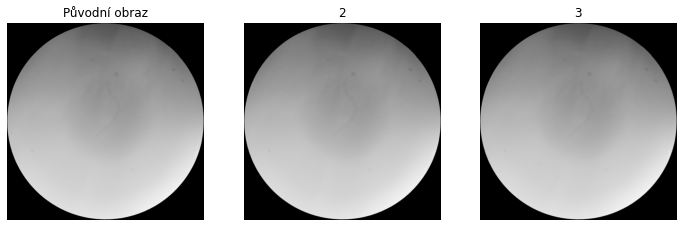

In [22]:
show_res_focus('./data/blurred/021_F1_2755.JPG')

In [ ]:
show_res_focus("./STRaDeSetB_preprocessed/002_R2_2569.JPG")

In [ ]:
show_res_focus("./STRaDeSetB_preprocessed/Failure_cases/041_F1_3058.JPG")

In [ ]:
show_res_focus("./STRaDeSetB_preprocessed/Failure_cases/031_F2_2940.JPG")

## Brightness assesment algorithm

In [ ]:
def create_colormap(path):
    processed = 0
    for img_path in glob.iglob(f'{path}/*.JPG'):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # [0, 1] - hue and saturation
        hist = cv2.calcHist([img], [0, 1], None, [180, 256], [0, 180, 0, 256])
        cv2.normalize(hist,hist,0,255,cv.NORM_MINMAX)
        avg += hist
        processed += 1
    avg /= processed # normalization to one common histogram
    return avg
    
def features_brightness(img):
    cm_light = create_colormap("./data/light")
    cm_dark = create_colormap("./data/dark")
    cm_normal = create_colormap("./data/normal")
    rows,cols,_ = img.shape
    bp_bright = cv.calcBackProject([img], [0, 1], cm_light, [0, 180, 0, 256], 1)
    bp_dark = cv.calcBackProject([img], [0, 1], cm_dark, [0, 180, 0, 256], 1)
    bp_normal = cv.calcBackProject([img], [0, 1], cm_normal, [0, 180, 0, 256], 1)
    CM1 = cv2.sumElems(bp_bright)[0]/(rows*cols)
    CM2 = cv2.sumElems(bp_dark)[0]/(rows*cols)
    CM3 = cv2.sumElems(bp_normal)[0]/(rows*cols)
    return CM1, CM2, CM3

In [ ]:
# def show_res_brightness(img):
    #TODO
    
# def dataset_results_brightness(path):
    #TODO
